In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress


In [3]:
cpi_df = pd.read_csv("CPI.csv",encoding='ISO-8859-1')
cpi_df.columns = cpi_df.columns.str.strip().str.replace(' ', '_').str.lower()
cpi_df.head()

,"ï»¿""country_name""",country_code,indicator_name,indicator_code,attribute,1970,1971,1972,1973,1974,...,2016,2017,2018,2019,2020,2021,2022,2023,common_reference_period,unnamed:_60
0,Lithuania,946,"Furnishings, household equipment and routine h...",PCPIHO_IX,Value,NaN,NaN,NaN,NaN,NaN,...,100.946758333333,102.2104,102.755408333333,104.482908333333,107.4834,111.921683333333,125.932591666667,137.867383333333,2015A,NaN
1,Lithuania,946,"Furnishings, household equipment and routine h...",PCPIHO_IX,Reference Period,NaN,NaN,NaN,NaN,NaN,...,2015A,2015A,2015A,2015A,2015A,2015A,2015A,2015A,NaN,NaN
2,Lithuania,946,"Housing, Water, Electricity, Gas and Other Fue...",PCPIH_PC_PP_PT,Value,NaN,NaN,NaN,NaN,NaN,...,-2.02902533817092,1.10622067849191,4.08208660397176,2.12479392631041,-3.40343070487908,7.83983909085155,49.1615302113532,8.53612997118616,NaN,NaN
3,France,132,Miscellaneous goods and services,PCPIO_IX,Value,NaN,NaN,NaN,NaN,NaN,...,101.045833333333,102.15,103.305833333333,104.495833333333,105.675833333333,106.7925,110.665833333333,115.055833333333,2015A,NaN
4,France,132,Miscellaneous goods and services,PCPIO_IX,Reference Period,2015A,2015A,2015A,2015A,2015A,...,2015A,2015A,2015A,2015A,2015A,2015A,2015A,2015A,NaN,NaN


In [4]:
cpi_df.columns = cpi_df.columns.str.strip()
cpi_df.columns

Index(['ï»¿"country_name"', 'country_code', 'indicator_name', 'indicator_code',
       'attribute', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', 'common_reference_period', 'unnamed:_60'],
      dtype='object')

In [5]:
consumer_df = pd.read_csv("GlobalDatasetofInflation.csv",encoding='ISO-8859-1')
consumer_df.columns

Index(['Country Code', 'IMF Country Code', 'Country', 'Indicator Type',
       'Series Name', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'Note', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63'],
      dtype='object')

In [6]:
consumer_df['Series Name'].unique()

array(['Headline Consumer Price Inflation',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation',
       'Producer Price Inflation'], dtype=object)

In [7]:
consumer = consumer_df[consumer_df['Series Name'] == 'Official Core Consumer Price Inflation']
consumer = consumer.drop_duplicates()
consumer = consumer.fillna(0)
consumer


,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
557,AFG,512.0,Afghanistan,Inflation,Official Core Consumer Price Inflation,0.000000,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,All Items Excluding Food and Energy,Additional countries from the previous update,0.0,0.0,0.0,0.0
558,ALB,914.0,Albania,Inflation,Official Core Consumer Price Inflation,0.000000,0.00,0.00,0.00,0.00,...,0.74,1.41,1.68,6.12,All Items Excluding Food and Energy,0,0.0,0.0,0.0,0.0
559,AUS,193.0,Australia,Inflation,Official Core Consumer Price Inflation,5.028000,-10.91,6.34,8.56,15.55,...,1.49,0.44,1.41,5.05,All Items Excluding Food and Energy,0,0.0,0.0,0.0,0.0
560,AUT,122.0,Austria,Inflation,Official Core Consumer Price Inflation,3.684000,5.19,6.37,7.38,9.84,...,1.65,1.90,2.15,5.28,All Items Excluding Food and Energy,0,0.0,0.0,0.0,0.0
561,ARM,911.0,Armenia,Inflation,Official Core Consumer Price Inflation,0.000000,0.00,0.00,0.00,0.00,...,1.17,1.30,7.23,8.28,All Items Excluding Food and Energy,Additional countries from the previous update,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,USA,111.0,United States,Inflation,Official Core Consumer Price Inflation,6.245934,4.69,3.06,3.48,8.24,...,2.19,1.70,3.57,6.22,All Items Excluding Food and Energy,0,0.0,0.0,0.0,0.0
666,VEN,299.0,"Venezuela, RB",Inflation,Official Core Consumer Price Inflation,0.000000,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,"All Items Excluding Fruits, Vegetables, Taxed ...",0,0.0,0.0,0.0,0.0
667,VNM,582.0,Vietnam,Inflation,Official Core Consumer Price Inflation,0.000000,0.00,0.00,0.00,0.00,...,2.01,2.31,0.81,2.39,"All Items Excluding Housing, Water, Electricit...",0,0.0,0.0,0.0,0.0
668,XKX,967.0,Kosovo,Inflation,Official Core Consumer Price Inflation,0.000000,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,All Items Excluding Food and Energy,0,0.0,0.0,0.0,0.0


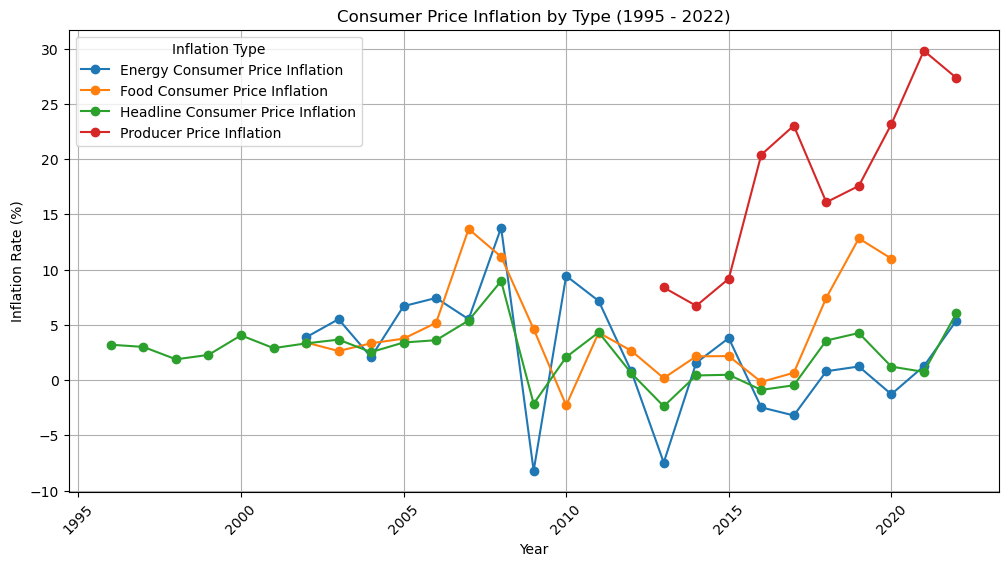

In [8]:
years = [str(year) for year in range(1970, 2023)]
inflation_types = [
    'Headline Consumer Price Inflation',
    'Energy Consumer Price Inflation',
    'Food Consumer Price Inflation',
    'Producer Price Inflation'
]


filtered_df = consumer_df[consumer_df['Series Name'].isin(inflation_types)]


long_df = filtered_df.melt(
    id_vars=['Series Name'],    
    value_vars=years,           
    var_name='Year',            
    value_name='Inflation Rate' 
)


long_df['Year'] = long_df['Year'].astype(int)

long_df = long_df.drop_duplicates(subset=['Year', 'Series Name'])


pivoted_consumer = long_df.pivot(index='Year', columns='Series Name', values='Inflation Rate')


plt.figure(figsize=(12, 6))

for column in pivoted_consumer.columns:
    plt.plot(pivoted_consumer.index, pivoted_consumer[column], marker='o', label=column)


plt.title("Consumer Price Inflation by Type (1995 - 2022)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend(title="Inflation Type")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
#Conclusion is CPI does not match closely with Producer or Food inflation but does match closely with energy.  Thus it is independent from other types of inflation.

In [10]:
cpi_df['indicator_name'].unique()
unique_indicators = cpi_df['indicator_name'].unique()
unique_indicators



array(['Furnishings, household equipment and routine household maintenance',
       'Housing, Water, Electricity, Gas and Other Fuels, Percentage change, Previous period',
       'Miscellaneous goods and services', 'Communication',
       'Recreation and culture',
       'Consumer Price Index, All items, Percentage change, Previous period',
       'Consumer Price Index, All items, Percentage change, Previous year',
       'Health', 'Transport',
       'Furnishings, household equipment and routine household maintenance, Percentage change, Previous year',
       'Housing, Water, Electricity, Gas and Other Fuels, Percentage change, Previous year',
       'Clothing and footwear, Percentage change, Previous year',
       'Housing, Water, Electricity, Gas and Other Fuels',
       'Education, Percentage change, Previous period',
       'Education, Percentage change, Previous year',
       'Restaurants and hotels, Percentage change, Previous period',
       'Restaurants and hotels, Percentage 

In [11]:
import re
unique_categories = set()
trimmed_indicators = []

for indicator in unique_indicators:
    # Extract the root name by removing any text after a comma
    root_name = re.split(r',', unique_indicators)[0].strip()
    if root_name not in unique_categories:
        unique_categories.add(root_name)
        trimmed_indicators.append(unique_indicators)

        trimmed_indicators

TypeError: cannot use a string pattern on a bytes-like object

In [ ]:
print(cpi_df.columns)

Index(['ï»¿"country_name"', 'country_code', 'indicator_name', 'indicator_code',
       'attribute', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', 'common_reference_period', 'unnamed:_60'],
      dtype='object')


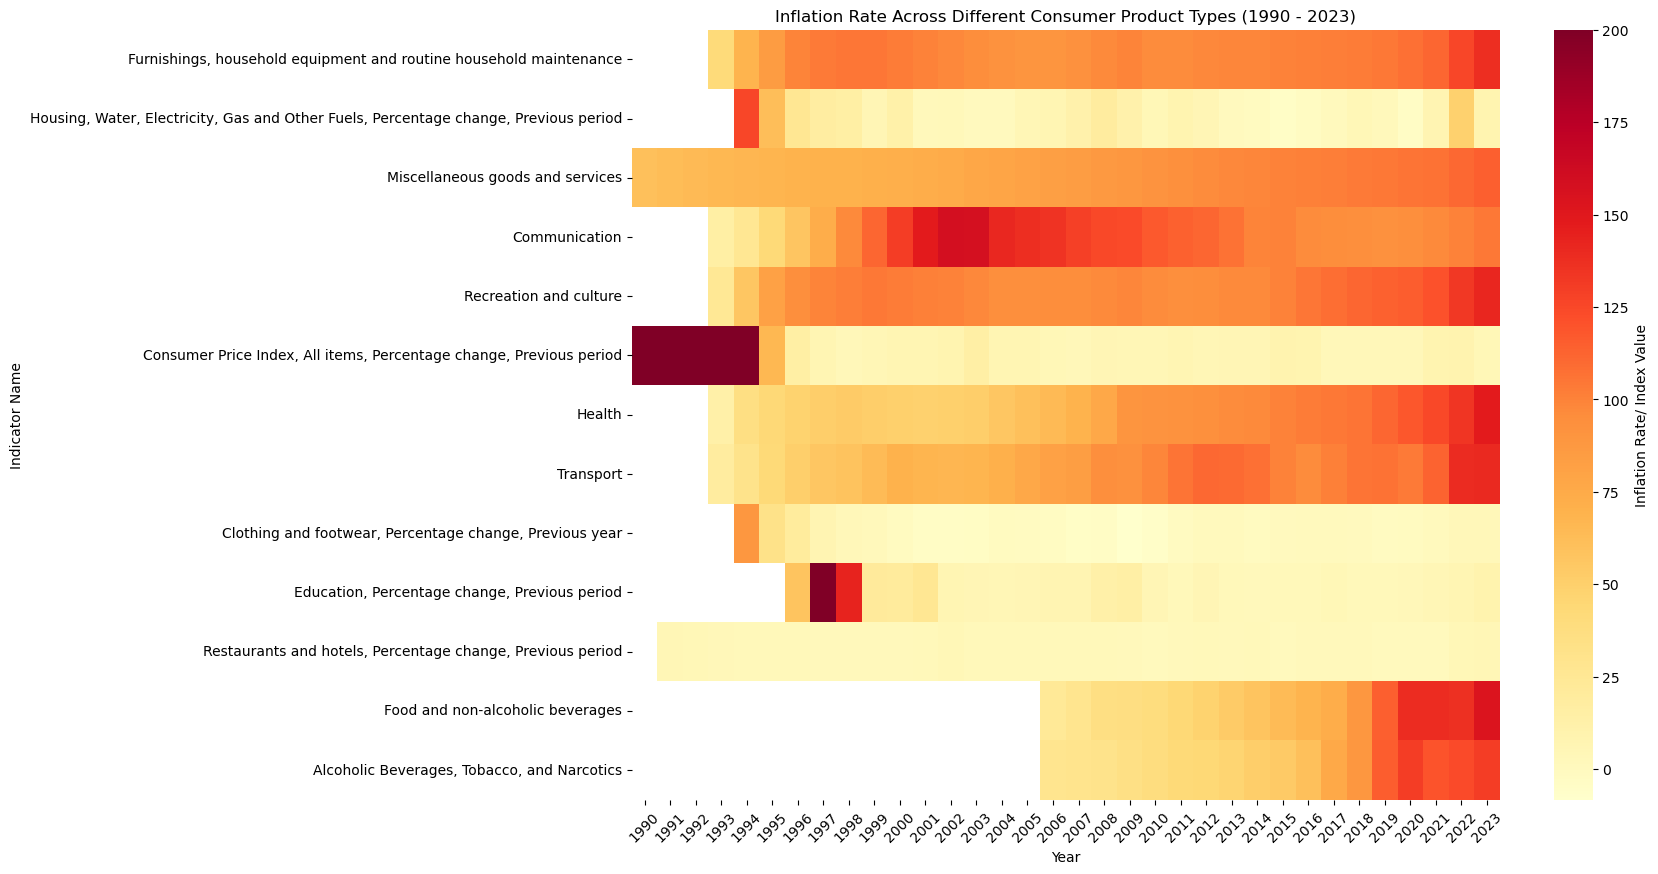

In [12]:
filtered_cpi_df = cpi_df


year_columns = [str(year) for year in range(1990, 2024)]
selected_data = filtered_cpi_df[['indicator_name'] + year_columns]


import re

unique_categories = set()
filtered_rows = []

for _, row in selected_data.iterrows():
    indicator_name = row['indicator_name']
    root_name = re.split(r',', indicator_name)[0].strip()
    

    if root_name not in unique_categories:
        unique_categories.add(root_name)
        filtered_rows.append(row)

selected_data = pd.DataFrame(filtered_rows)

selected_data.set_index('indicator_name', inplace=True)
selected_data = selected_data.apply(pd.to_numeric, errors='coerce')


selected_data = selected_data[~selected_data.index.duplicated(keep='first')]


plt.figure(figsize=(14, 10))
sns.heatmap(selected_data, cmap="YlOrRd", cbar_kws={'label': 'Inflation Rate/ Index Value'}, 
            annot=False, fmt=".1f", vmax=200)


plt.title("Inflation Rate Across Different Consumer Product Types (1990 - 2023)")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Indicator Name")


plt.show()

In [ ]:
Health, transport clothing/footwear  and Utilies are closely tied in inflation rates.  Recreation, Health Transpord, food and non alcoholic beverages and alcohol are tied closely in inflation rates.  

In [48]:
yearly_means = selected_data.mean(axis=0)
print(yearly_means)

1970            NaN
1971            NaN
1972            NaN
1973            NaN
1974            NaN
1975            NaN
1976            NaN
1977            NaN
1978            NaN
1979            NaN
1980            NaN
1981     101.725073
1982     100.543359
1983     135.027682
1984     192.121733
1985     225.989665
1986     147.142826
1987     228.336163
1988     629.114509
1989    1430.723725
1990    1504.241803
1991     166.875616
1992     340.296546
1993     264.114662
1994     257.936512
1995      52.566980
1996      49.222915
1997     123.747044
1998      59.557458
1999      49.387600
2000      51.684588
2001      52.048365
2002      51.587813
2003      51.734867
2004      49.973156
2005      50.876220
2006      47.915326
2007      48.825378
2008      52.457144
2009      53.117999
2010      52.307689
2011      54.012168
2012      55.396234
2013      55.282932
2014      55.268428
2015      55.916804
2016      57.281553
2017      59.554763
2018      62.687033
2019      67.272262
